# Vizualiztion of current data


### Steps
1. Import libraries.
2. Read data: There are 3 datasets, hence loading them seperately:

    * [NYPD dataset](https://catalog.data.gov/dataset/nypd-arrests-data-historic): Has 19 indicators and about 5.5 million observations. Includes all arrest records from 2006 to present reported in NYC by NYPD.
   
    * [Chicago dataset](https://www.kaggle.com/datasets/middlehigh/los-angeles-crime-data-from-2000?select=Chicage+Crime+Data.csv): a combination of four datasets which together cover all arrests in Chicago, IL, for the years 2001 t0 2017. Has 22 indicators and about ___ observations.
    
    * [LA dataset](https://www.kaggle.com/datasets/middlehigh/los-angeles-crime-data-from-2000?select=Chicage+Crime+Data.csv): Has 28 indicators and about ___ observations. Includes all crime data in Los Angeles, CA, from 2019 to 2024.  
3. Clean data. 
    * In our research we learned that there is a relationship between recessions and crime such as **homicide**, **robbery**, and **burglary**. Furthermore, we learned that there was a significant rise in **domestic violence** cases during the COVID-19 pandemic.
    * Foe each dataset we would visualize the relevant crimes:
        * NYPD: This dataset covers the 2008-2009 recession period until present day. Thus, we would focus on _all four crimes_ mentioned above.
        * Chicago: Since this dataset does not cover the pandemic period, we would focus on _homicide_, _robbery_, and _burglery_. 
        * LA: This dataset covers the years 2020 to present day. Thus, we would cover _all four crimes_ mentioned above.
    * **Note that domestic violence is not specified as such. Would be treated in the future.**



In [1]:
import pandas as pd
import warnings

import matplotlib.pyplot as plt


import numpy as np
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays
from sklearn.naive_bayes import MultinomialNB, CategoricalNB

In [2]:
NYPD = pd.read_csv('NYPD_Arrests_Data__Historic_.csv', sep=',')

print(NYPD.shape)
NYPD.head()

(5725522, 19)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,186134240,08/07/2018,184.0,NaN,NaN,NaN,PL 12070E1,F,K,73,0.0,45-64,M,BLACK,1007585.0,183788.0,40.671110,-73.915881,POINT (-73.91588130999997 40.67110980800004)
1,220476154,11/13/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,40,0.0,25-44,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
2,199148493,07/01/2019,440.0,NaN,NaN,NaN,PL 1553502,F,M,23,1.0,25-44,M,BLACK HISPANIC,998829.0,226859.0,40.789348,-73.947352,POINT (-73.94735241299998 40.78934789300007)
3,209928408,02/22/2020,569.0,"MARIJUANA, SALE 4 & 5",235.0,DANGEROUS DRUGS,PL 2214000,M,M,32,0.0,25-44,M,BLACK,1001610.0,241367.0,40.829163,-73.937272,POINT (-73.93727189399993 40.829163304000076)
4,220330574,11/10/2020,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,49,0.0,25-44,M,WHITE,1024396.0,250744.0,40.854826,-73.854880,POINT (-73.85487970999998 40.85482622300003)


In [3]:
NYPD['ARREST_DATE'] = pd.to_datetime(NYPD['ARREST_DATE'])

print(NYPD.sort_values(by='ARREST_DATE',  ascending=True))

         ARREST_KEY ARREST_DATE  PD_CD  \
956330      9929833  2006-01-01  792.0   
946556      9930206  2006-01-01  759.0   
949187      9929883  2006-01-01  567.0   
940774      9929972  2006-01-01  109.0   
942241      9932757  2006-01-01  109.0   
...             ...         ...    ...   
5669560   279763796  2023-12-31  397.0   
5702684   279763275  2023-12-31  101.0   
5676816   279744149  2023-12-31  905.0   
5718615   279740764  2023-12-31  101.0   
5672849   279754143  2023-12-31  101.0   

                                          PD_DESC  KY_CD  \
956330                   WEAPONS POSSESSION 1 & 2  118.0   
946556   PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4  359.0   
949187                MARIJUANA, POSSESSION 4 & 5  235.0   
940774                   ASSAULT 2,1,UNCLASSIFIED  106.0   
942241                   ASSAULT 2,1,UNCLASSIFIED  106.0   
...                                           ...    ...   
5669560            ROBBERY,OPEN AREA UNCLASSIFIED  105.0   
5702684        

In [4]:
warnings.filterwarnings('ignore')


df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',  error_bad_lines=False, warn_bad_lines=True)
df2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False, warn_bad_lines=True)
df3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, warn_bad_lines=True)
df4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, warn_bad_lines=True)

warnings.filterwarnings('default')

chicago = pd.concat([df1, df2, df3, df4], ignore_index=True)

chicago.to_csv('chicago.csv', index=False)

print(chicago.shape)
chicago.head()

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


(7941282, 23)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
LA = pd.read_csv('Crime_Data_from_2020_to_Present.csv', sep=',')

print(LA.shape)
LA.head()

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(829778, 28)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [6]:
# changing all spaces in the columns' names to underscores

# chicago
chicago.columns = chicago.columns.str.replace(' ', '_')

# LA
LA.columns = LA.columns.str.replace(' ', '_')

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Since we want to check if there are any domestic violence crimes, we would run the following cell to see what the row numbers that contain it, and if there are not any, it would return `none`.

**WOULD BE TREATED IN THE FUTURE**

In [7]:
# NYPD PD_DESC
#NYPD_domestic1 = NYPD['PD_DESC'].str.contains(r'\bdomestic\b', case= False, na=False)
#NYPD_list1 = NYPD.index[NYPD_domestic1].tolist()

#if NYPD_list1:
   # print(NYPD_list1)
#else:
 #  print('none')

In [8]:
# NYPD OFNS_DESC
#NYPD_domestic2 = NYPD['OFNS_DESC'].str.contains(r'\domestic\b', case= False, na=False)
#NYPD_list2 = NYPD.index[NYPD_domestic2].tolist()

#if NYPD_list2:
    #print(NYPD_list2)
#else:
   # print('none')

In [9]:
# LA
#LA_domestic = LA['Crm_Cd_Desc'].str.contains(r'\bdomestic\b', case= False, na=False)
#LA_list = LA.index[LA_domestic].tolist()

#if LA_list:
 #   print(LA_list)
#else:
 #   print('none')

In [10]:
# check if there are null values

null_NYPD = NYPD.isnull().sum().loc[lambda x: x > 0]
print(null_NYPD)

PD_CD                  876
PD_DESC               9169
KY_CD                 9756
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           23600
ARREST_BORO              8
JURISDICTION_CODE       10
AGE_GROUP               17
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64


The NYPD dataset has more than 5.5 million observations. Since there are so many observations, we can confidently remove these observations from the dataset as we would still have more than 5 million observations after doind so. 

<span style="color: red">This needs to be fixed - we should drop those after we filter out the needed offenses because it drops too many observations here (basically need to drop all unnecessary columns after filtering out the ofenses, and then dropping null observations.</span>

In [11]:
NYPD = NYPD.dropna()

null_NYPD = NYPD.isnull().sum().loc[lambda x: x > 0]
print(null_NYPD)

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], dtype: int64)


I will now create a new dataset that contains all observations in which the offence is homicide, robbery, or burglary.

In [12]:
NYPD_filtered = NYPD[NYPD['OFNS_DESC'].str.contains(r'(?i)\brobbery\b|\bburglary\b|\bhomicide\b', na=False)]
NYPD_filtered.head()

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
1,220476154,2020-11-13,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,40,0.0,25-44,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026)
5,220509245,2020-11-14,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1402502,F,M,19,0.0,45-64,M,WHITE HISPANIC,994297.0,218680.0,40.766905,-73.963731,POINT (-73.96373101899997 40.76690500600006)
15,219850107,2020-10-28,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,Q,103,0.0,18-24,M,BLACK,1041879.0,197084.0,40.707447,-73.792142,POINT (-73.79214176799998 40.707447364000075)
17,217909568,2020-09-16,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,Q,107,0.0,45-64,M,WHITE,1036790.0,205267.0,40.729939,-73.810433,POINT (-73.81043314199997 40.729939364000074)
18,218229753,2020-09-23,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,K,81,0.0,18-24,M,BLACK,1000937.0,191378.0,40.691958,-73.939828,POINT (-73.93982782299997 40.691957657000046)


In [13]:
print(NYPD_filtered.shape)

(280206, 19)


/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<span style="color: red">This is the problem.</span>

In [14]:
NYPD_filtered['Robbery'] = NYPD_filtered['OFNS_DESC'].str.contains(r'\brobbery\b', case = False, na= False).astype(int)
NYPD_filtered['Homicide'] = NYPD_filtered['OFNS_DESC'].str.contains(r'\bhomicide\b', case = False, na= False).astype(int)
NYPD_filtered['Burglary'] = NYPD_filtered['OFNS_DESC'].str.contains(r'\bBurglary\b', case = False, na= False).astype(int)

NYPD_filtered.head()

<ipython-input-14-ace12129b17e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYPD_filtered['Robbery'] = NYPD_filtered['OFNS_DESC'].str.contains(r'\brobbery\b', case = False, na= False).astype(int)
<ipython-input-14-ace12129b17e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYPD_filtered['Homicide'] = NYPD_filtered['OFNS_DESC'].str.contains(r'\bhomicide\b', case = False, na= False).astype(int)
<ipython-input-14-ace12129b17e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Robbery,Homicide,Burglary
1,220476154,2020-11-13,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,B,40,...,M,BLACK,1005041.0,234533.0,40.810398,-73.924895,POINT (-73.92489531099994 40.810398494000026),1,0,0
5,220509245,2020-11-14,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1402502,F,M,19,...,M,WHITE HISPANIC,994297.0,218680.0,40.766905,-73.963731,POINT (-73.96373101899997 40.76690500600006),0,0,1
15,219850107,2020-10-28,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,Q,103,...,M,BLACK,1041879.0,197084.0,40.707447,-73.792142,POINT (-73.79214176799998 40.707447364000075),1,0,0
17,217909568,2020-09-16,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,Q,107,...,M,WHITE,1036790.0,205267.0,40.729939,-73.810433,POINT (-73.81043314199997 40.729939364000074),1,0,0
18,218229753,2020-09-23,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,K,81,...,M,BLACK,1000937.0,191378.0,40.691958,-73.939828,POINT (-73.93982782299997 40.691957657000046),1,0,0


In [15]:
NYPD_grouped = NYPD_filtered.groupby(pd.Grouper(key='ARREST_DATE', freq = 'Q')).agg({'Robbery':'sum','Burglary':'sum','Homicide':'sum'}).reset_index()
NYPD_grouped.head()

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ARREST_DATE,Robbery,Burglary,Homicide
0,2006-03-31,3043,1049,4
1,2006-06-30,3044,1030,3
2,2006-09-30,2907,1154,5
3,2006-12-31,3255,1263,5
4,2007-03-31,2862,1159,2


In [16]:
NYPD_grouped['quarter'] = 'Quarter' + NYPD_grouped['ARREST_DATE'].dt.quarter.astype(str) + ', ' + NYPD_grouped['ARREST_DATE'].dt.year.astype(str)

NYPD_grouped.head()

/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ARREST_DATE,Robbery,Burglary,Homicide,quarter
0,2006-03-31,3043,1049,4,"Quarter1, 2006"
1,2006-06-30,3044,1030,3,"Quarter2, 2006"
2,2006-09-30,2907,1154,5,"Quarter3, 2006"
3,2006-12-31,3255,1263,5,"Quarter4, 2006"
4,2007-03-31,2862,1159,2,"Quarter1, 2007"


/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


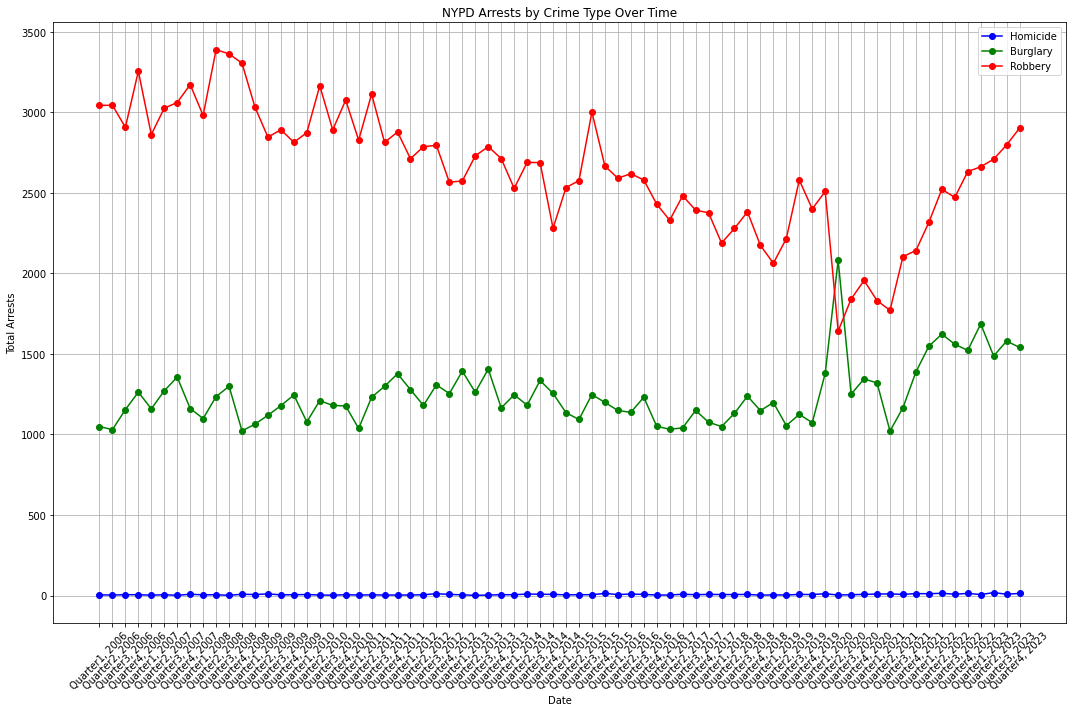

In [17]:
plt.figure(figsize=(15,10))

plt.plot(NYPD_grouped['quarter'], NYPD_grouped['Homicide'], label='Homicide', color = 'blue', marker='o')
plt.plot(NYPD_grouped['quarter'], NYPD_grouped['Burglary'], label='Burglary', color = 'green', marker='o')
plt.plot(NYPD_grouped['quarter'], NYPD_grouped['Robbery'], label='Robbery', color = 'red', marker='o')

plt.title('NYPD Arrests by Crime Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()